# Fake News Detection

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier

# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, matthews_corrcoef, precision_score, recall_score

In [ ]:
fake = pd.read_csv('/content/drive/MyDrive/Datasets/Fake.csv')
true = pd.read_csv('/content/drive/MyDrive/Datasets/True.csv')

In [ ]:
fake.head()

In [ ]:
true.head()

In [ ]:
fake.columns
true.columns

In [ ]:
fake.info()

In [ ]:
true.info()

In [ ]:
fake["class"] = 0
true["class"] = 1

In [ ]:
# fake.shape,true.shape

In [ ]:
data = pd.concat([fake,true] , axis = 0)

In [ ]:
# suffling the data
data = data.sample(frac = 1)

In [ ]:
# resetting index
data.reset_index(inplace = True)
data.drop(['index'] , axis = 1 , inplace= True)

In [ ]:
data = data.drop(['title' , 'subject' , 'date'] , axis = 1)
data.head()

In [ ]:

def newTest(text):
  text = text.lower()
  text = re.sub('\[.*?]','' , text)
  text = re.sub('https?://\S+ | www.\.\S+', '' , text)
  text = re.sub('<.*?>+', '' , text)
  text = re.sub('\n', '' , text)
  text = re.sub('[%s]' % re.escape(string.punctuation) , '', text)
  text = re.sub('\w*\d\w*' , '', text)
  return text

data['text'] = data['text'].apply(newTest)

In [ ]:
x = data['text']
y = data['class']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.25)

In [ ]:
#using TF-IDF vectorization for preparing text data for machine learning tasks

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [ ]:

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Classifier' : GradientBoostingClassifier(random_state=0)
}


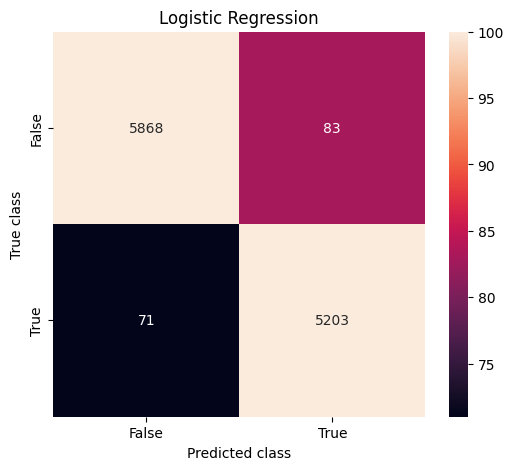

Logistic Regression
Accuracy:  0.9862806236080178
Precision:  0.9842981460461596
Recall:  0.9865377322715206
F1-Score:  0.9854166666666667


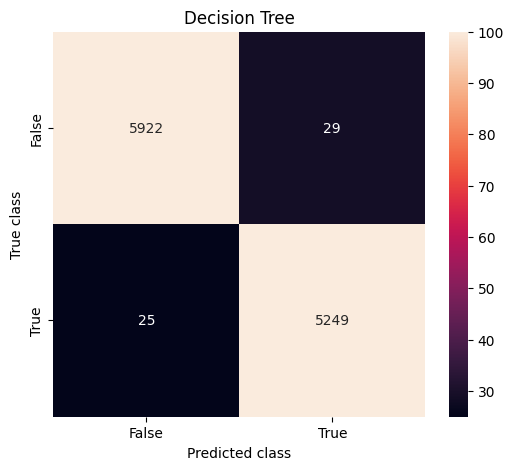

Decision Tree
Accuracy:  0.9951893095768374
Precision:  0.9945054945054945
Recall:  0.9952597648843383
F1-Score:  0.994882486732373


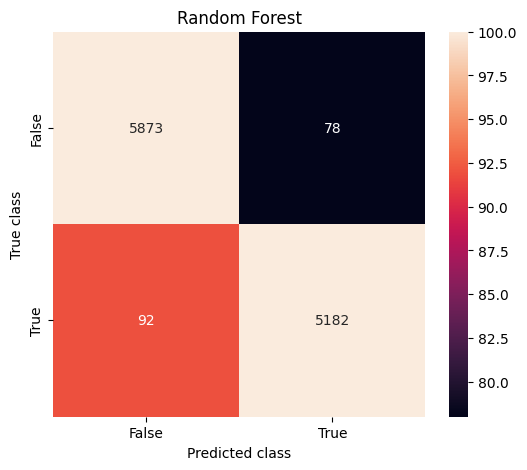

Random Forest
Accuracy:  0.9848552338530067
Precision:  0.9851711026615969
Recall:  0.9825559347743648
F1-Score:  0.983861780899943


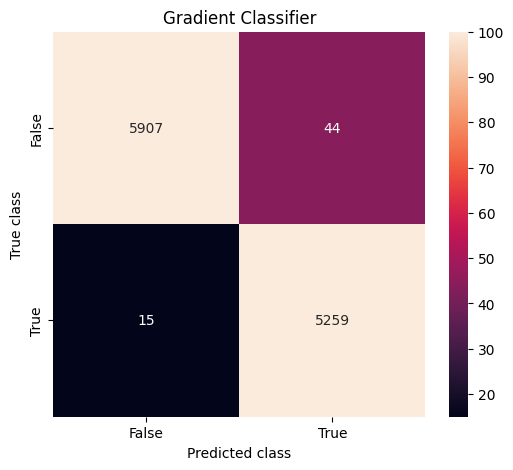

Gradient Classifier
Accuracy:  0.9947438752783965
Precision:  0.9917028097303413
Recall:  0.997155858930603
F1-Score:  0.9944218587501181


In [ ]:
for name, model in models.items():
    # start = time.time()
    model.fit(xv_train, y_train)
    y_predict = model.predict(xv_test)

    LABELS = ['False', 'True']
    conf_matrix = confusion_matrix(y_test, y_predict)
    plt.figure(figsize =(6,5))
    sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, vmax = 100, annot = True, fmt ="d");
    plt.title(f'{name}')
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print(name);
    print("Accuracy: ", accuracy_score(y_test, y_predict))
    print("Precision: ", precision_score(y_test, y_predict))
    print("Recall: ", recall_score(y_test, y_predict))
    print("F1-Score: ", f1_score(y_test, y_predict))